In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.svm as svm

import utils

In [84]:
import dataGenerator
import utils as u
import featureSelectionMethods as fs
import metricEvaluator as mev
importlib.reload(fs)
importlib.reload(u)
importlib.reload(dataGenerator)

<module 'dataGenerator' from 'C:\\Users\\18pep\\Documents\\sem_I\\DVaE\\clustering_dimensions_reduction\\dataGenerator.py'>

In [85]:
def find_bucket(buckets,item):
    for key in buckets.keys():
        if item <=buckets[key]:
            return key

In [78]:
buckets={"relevant":4,"irrelevant":9,"correlated":14,"redundant":19}
list(buckets.keys())

[('relevant', 4), ('irrelevant', 9), ('correlated', 14), ('redundant', 19)]

In [88]:
def task_1_B(ths,n_rel,method,generator,y_true):
    counters={"relevant":0,"irrelevant":0,"correlated":0,"redundant":0}
    metrics=["Bolon_Canedo","accuracy","F1"]
    
    metrics_val={}
    for metric in metrics:
        metrics_val[metric]=[]
    its=[]    
    for i in range(100):
        X,y=generator()
        all=np.arange(X.shape[1])
        model=fs.featureSelector(n=n_rel)
        y_pred=getattr(model,method)(X,y)
        
        mete=mev.metricEvaluator(y_pred,y_true,all)
        for metric in metrics:
            val=getattr(mete,metric)()
            metrics_val[metric].append(val)
        
        for j in y_pred:
            bucket=find_bucket(ths,j)
            counters[bucket]+=1
        its.append(i)
    plt.figure(figsize=(16,8))
    plt.xlabel("Iterations")
    plt.ylabel("metrics")
    plt.title(f"Feature Selection Method: {method} {n_rel} features")
    for metric in metrics:
        plt.plot(metrics_val[metric],label=metric)
    plt.legend()
    plt.savefig(f"plots\\{method}_{n_rel}_features.png")
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.xlabel("types")
    plt.ylabel("count")
    plt.title(f"Types of features selected: {method}")
    for key in counters.keys():
        plt.bar(key,counters[key],label=key)
    plt.savefig(f"plots\\{method}_{n_rel}_types.png")
    plt.show()
    
            
        

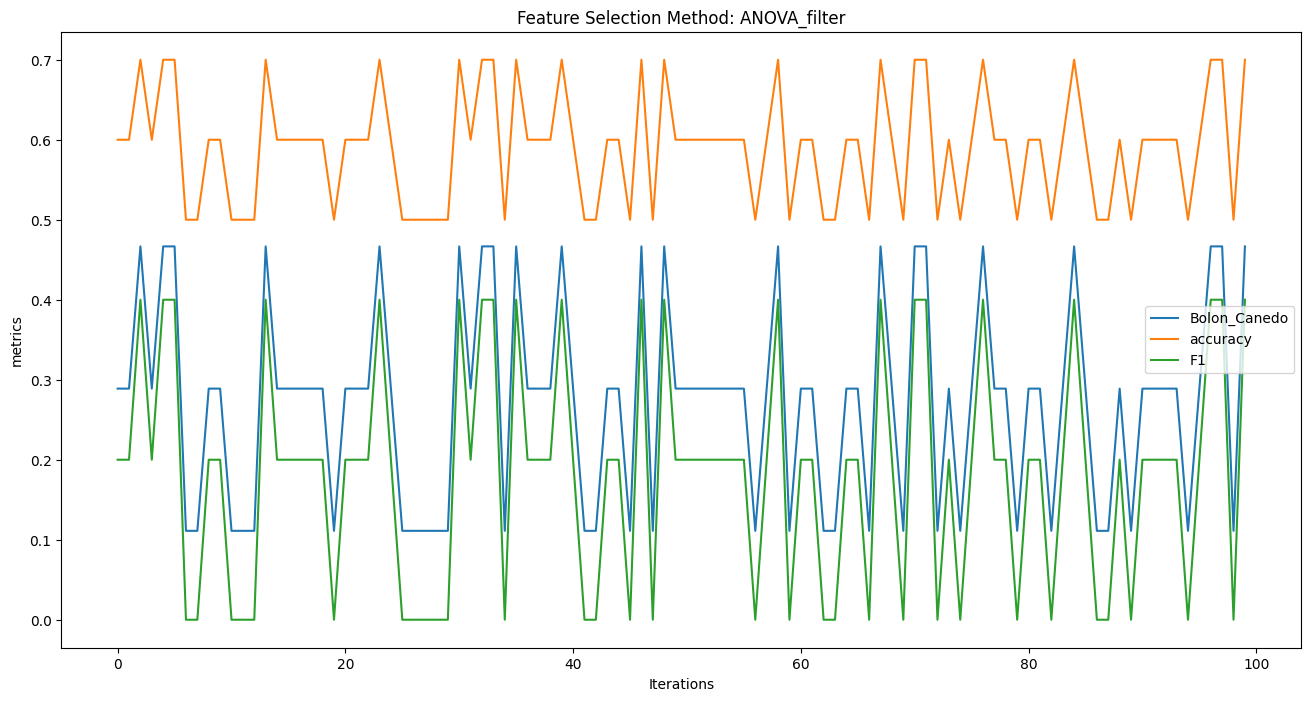

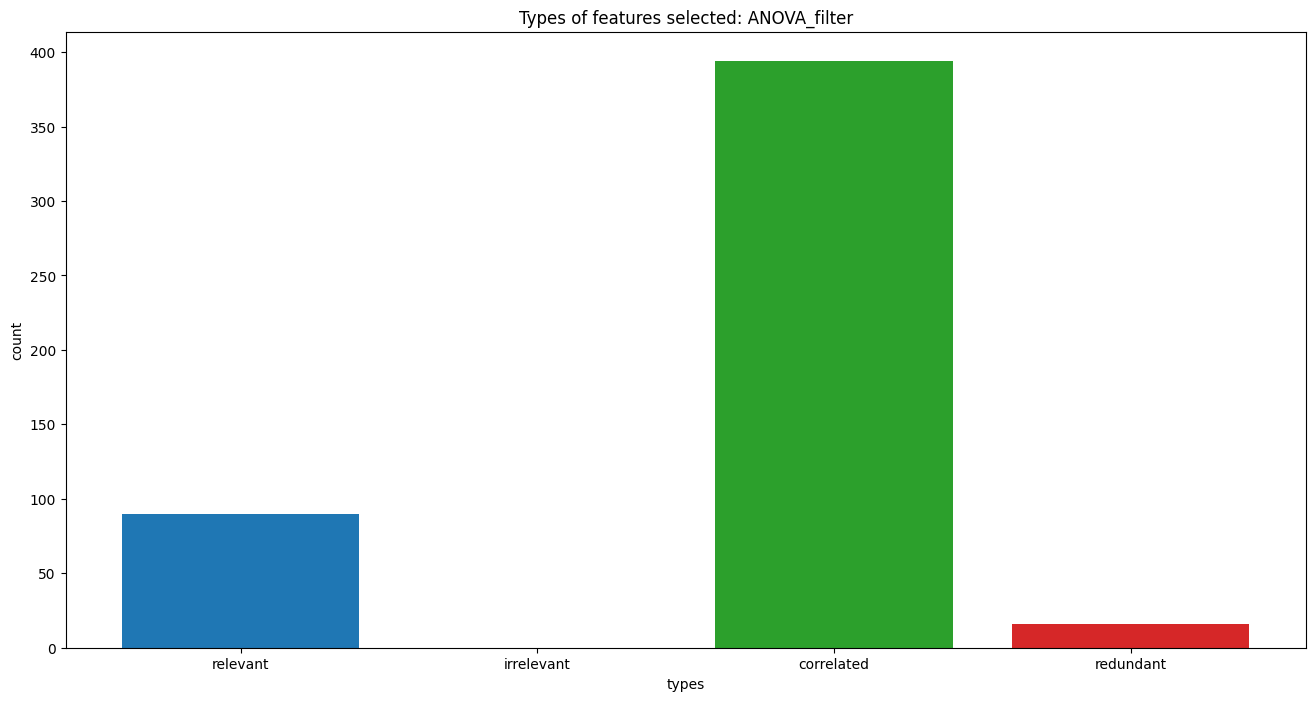

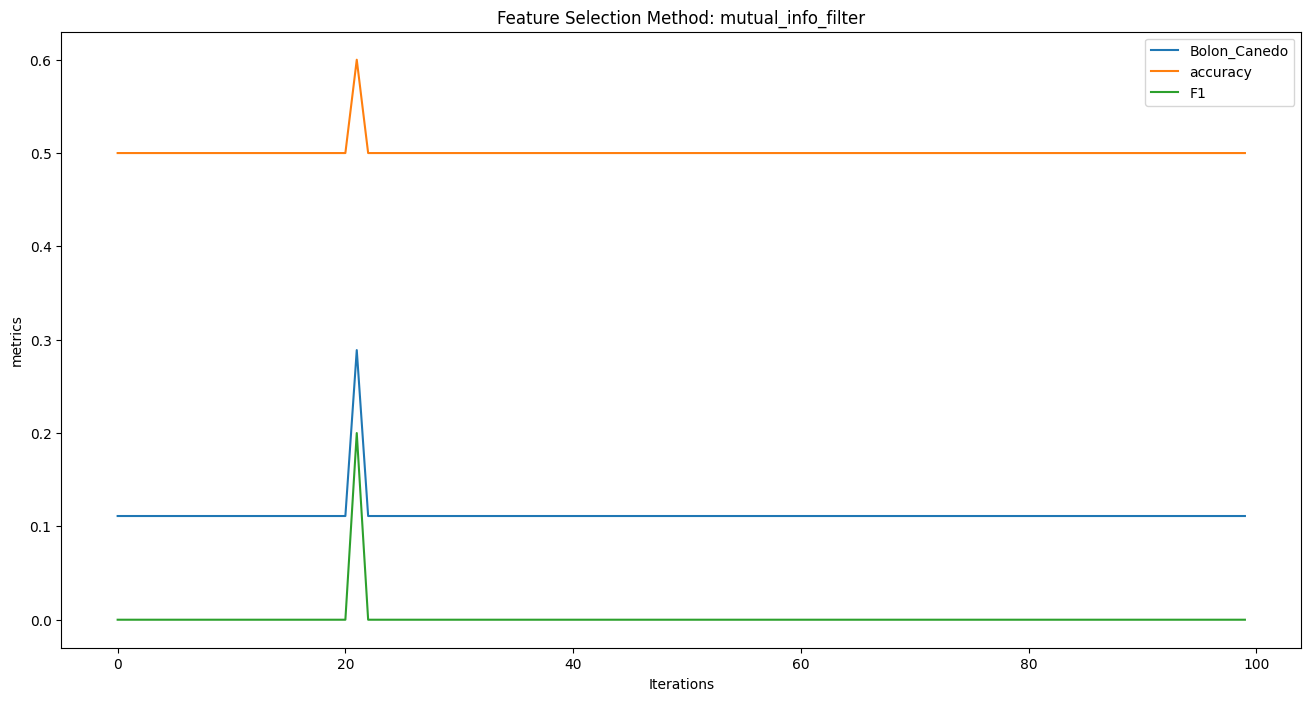

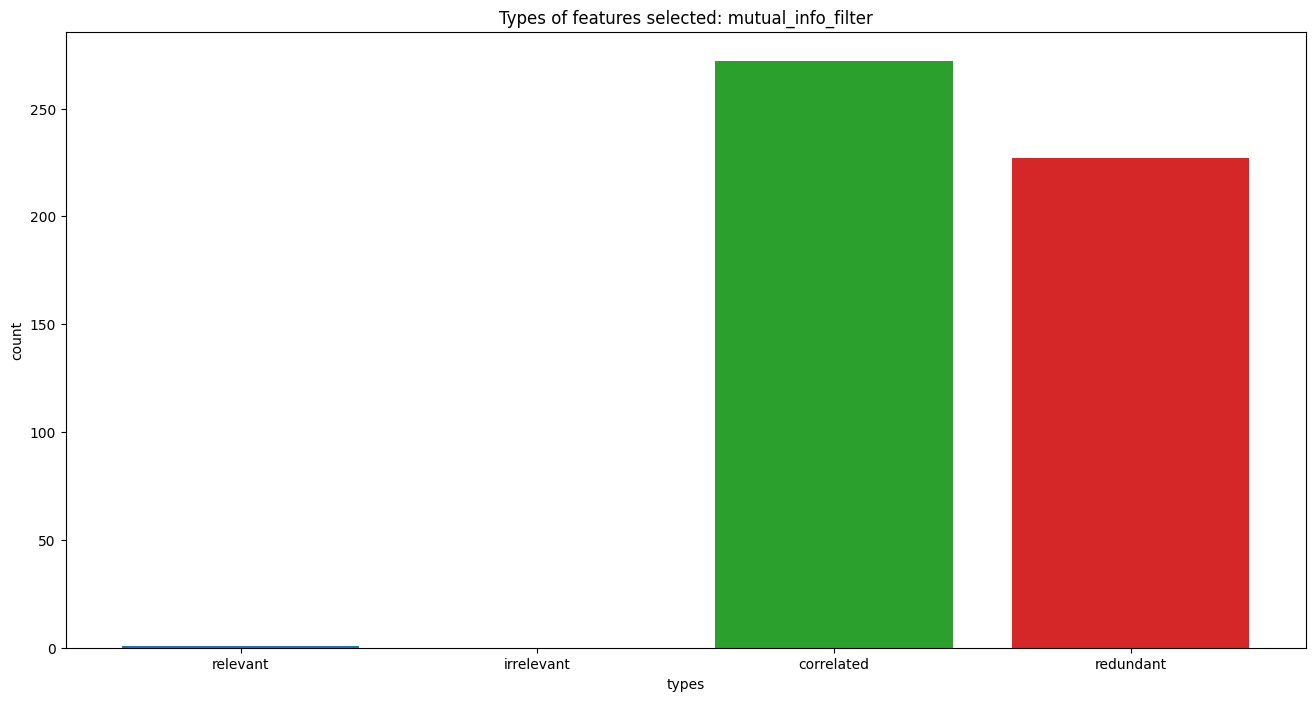

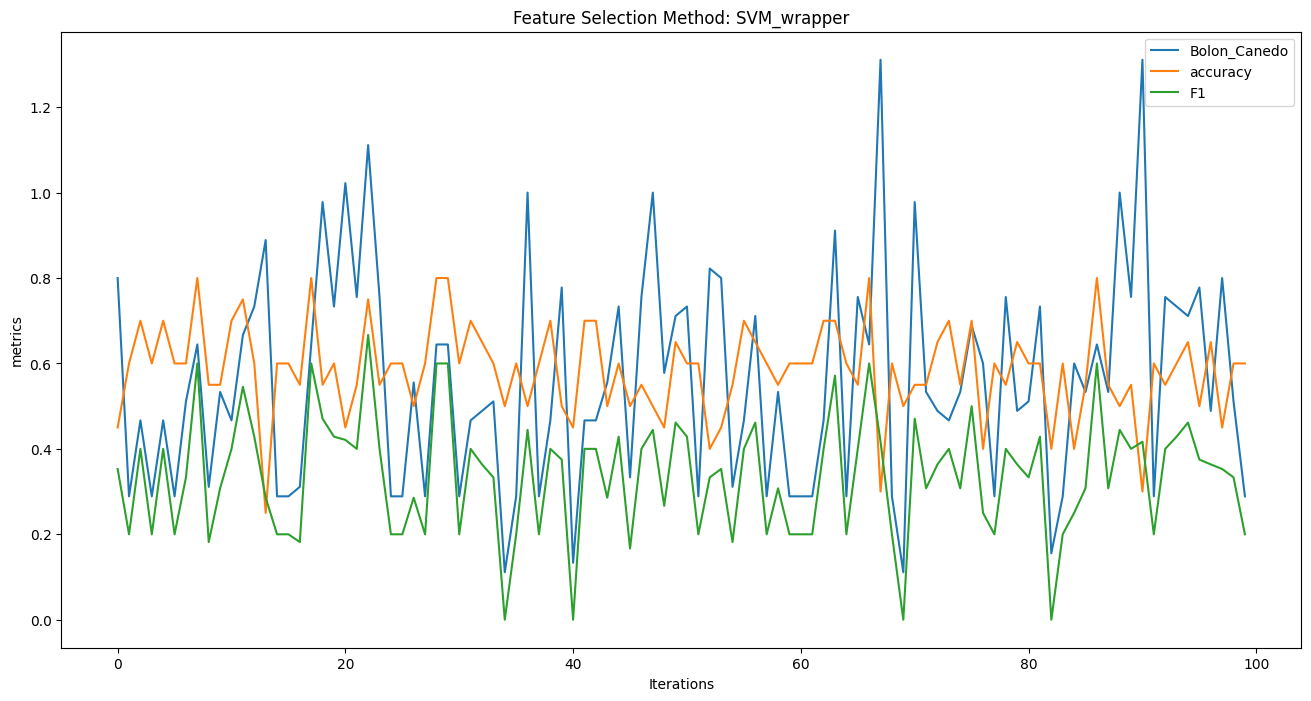

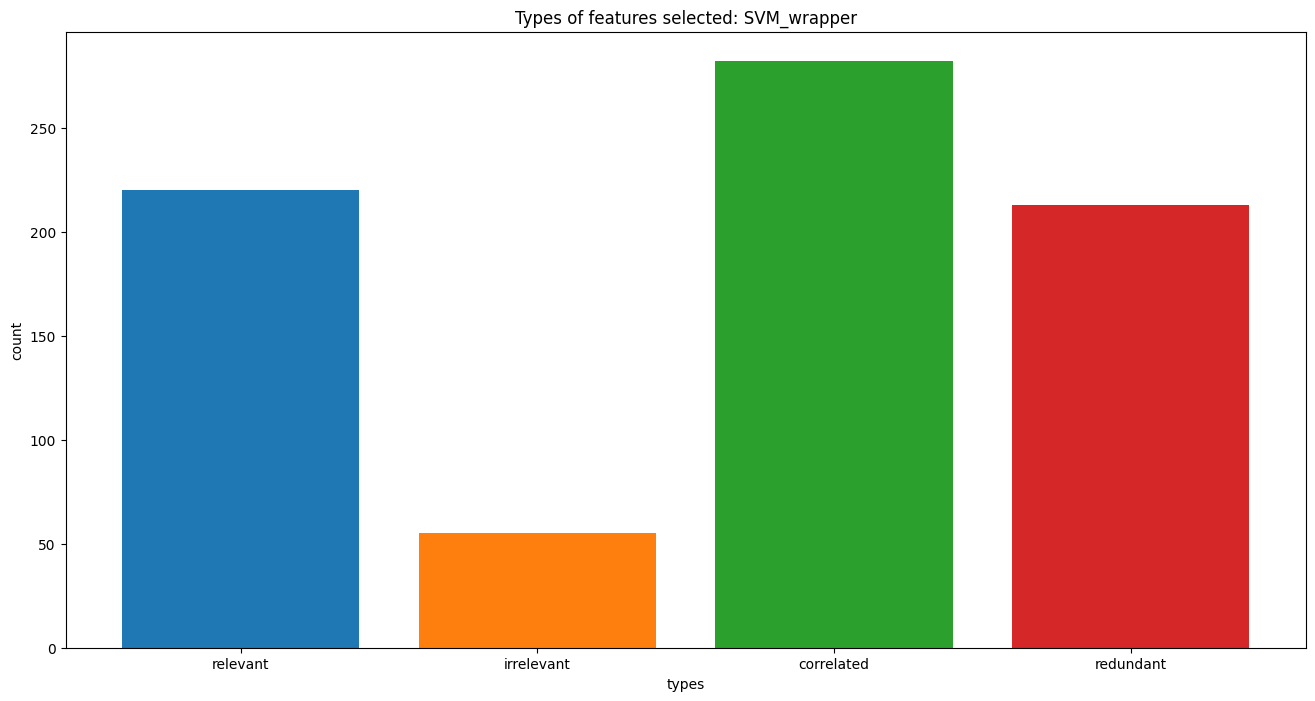

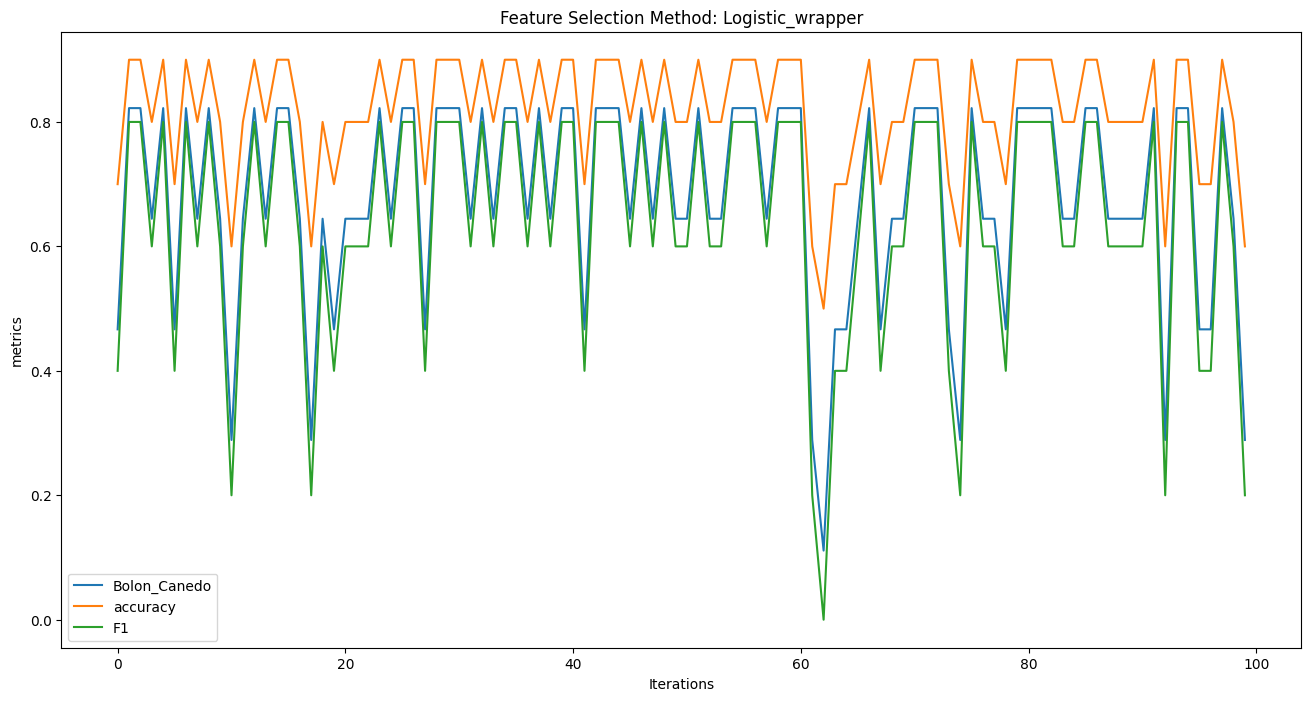

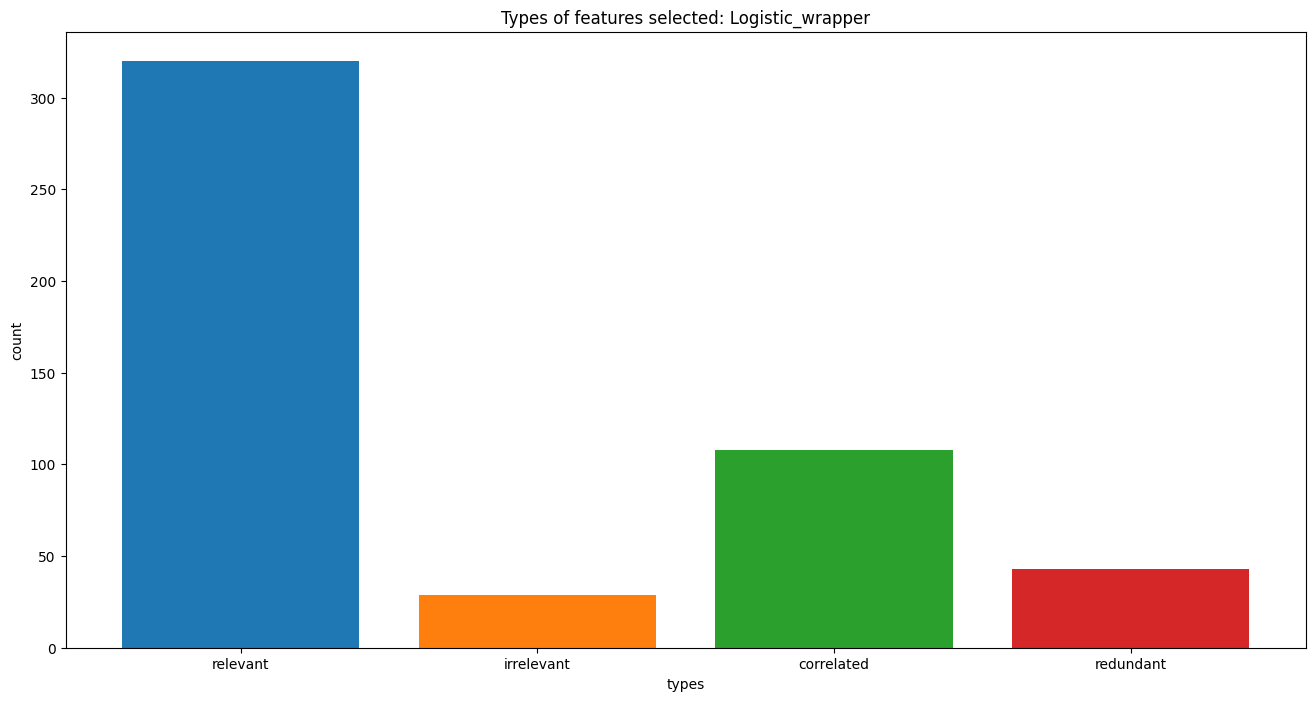

In [90]:
buckets={"relevant":4,"irrelevant":9,"correlated":14,"redundant":19}
y_true=np.arange(5)
methods=["ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper"]
for method in methods:    
    task_1_B(buckets,5,method,u.direct_build_20,y_true)
